### Logistic Regression
Logistic Regression is a supervised learing model / classifier used to predict discrete outcome. 

NOTE: We use logistic regression only if the data is linearly seperable.

In [351]:
#library for scientific computation
import numpy as np

#library for data analysis
import pandas as pd

#library for numeric computation, but used for plotting graphs here
from pylab import scatter, show, legend, xlabel, ylabel 

#library for mathematical calculations
import math

#library for data mining and analysis
from sklearn import preprocessing

#### Sigmoid Function
Sigmoid function takes in mathematical function that takes in input and outputs either 0 or 1.

In [352]:
def sigmoid_function(hypothesis):
    return float(1.0 / float(1.0 + math.exp(-1.0 * hypothesis)))

#### Hypothesis
Hypothesis define a line (decision bounday) that seperates or classifies the two dataset.

Mathematically, hypothesis equation:

    h(x) = theta_0 + theta_1 * feature_1 + theta_2 * feature_2...  [ϴ = Theta]

In equation, features's are know while we have to all find theta values such that it best classifies or seperates dataset.

Since we have 2 features, so the equation ignoring theta_0 will look like:

    h(x) = theta_1 * feature_1 + theta_2 * feature_2

In [353]:
def hypothesis(theta, x):
    return sigmoid_function((x[0] * theta[0]) + (x[1] * theta[1]))

#### Error / Cost Function
The cost/error function is used to calculate error.

NOTE: The cost function for logistic function is different for 2 different labels.

In [354]:
def cost_function(x, y, theta):
    totalError = 0
    
    for i in range(len(y)):        
        if y[i] == 1:
            totalError += y[i] * math.log(hypothesis(theta, x[i]))
        elif y[i] == 0:
            totalError += (1 - y[i]) * math.log(1 - hypothesis(theta, x[i]))
    
    return ((-1/len(y)) * totalError)

#### Gradient Descent
Gradient Descent is a process of finding the best fitting theta value. Mathematically, gradient descent is a partial derivative of a error/cost function.

In function, the current value for theta is runned across all dataset and the error is calculated for each value of theta with respect to each set of data. The sum of error across all data tell us by what factor do we need to adjust theta such that theta value will generalize for complete dataset. Then, the new theta value is adjusted and returned.

In [355]:
def gradient_descent(x, y, theta, alpha):
    new_theta = []
    
    for j in range(len(theta)):
        totalError = 0        
        for i in range(len(y)):
            totalError += ((hypothesis(theta, x[i]) - y[i]) * x[i][j])
    
        gradientTheta = ((float(alpha)/float(len(y))) * totalError)
        new_theta_value = theta[j] - gradientTheta
        new_theta.append(new_theta_value)
    
    return new_theta

### Training Model
We have a labeled dataset for student applying for admission with class 10 and class 12 grade. The column 'isAdmission' in the dataset is a label specifying if the student can get admission or not. Our task is to design a logistic regression modal that can classify student as admitable or not admitable based on class 10th and class 12th grade.

#### Prepare Dataset
We will load dataset and put label. Next, we will extract 'x' fro and later scale each feature value in range (-1,1), because training on scaled value performs better. Then, we will extract all labels in 'y' as a numpy array.

In [356]:
dataset = pd.read_csv("logistic-regression-data.csv", header=0)

dataset.columns = ["10th Exam", "12th Exam", "isAdmission"]

x = dataset[["10th Exam", "12th Exam"]]
x = preprocessing.MinMaxScaler(feature_range=(-1,1)).fit_transform(x)

y = dataset["isAdmission"].map(lambda x: float(x.rstrip(';')))
y = np.array(y)

#NOTE: the next line need to be in the last (don't know why)
dataset.head()

,10th Exam,12th Exam,isAdmission
0,34.623660,78.024693,0;;;;
1,30.286711,43.894998,0;;;;
2,35.847409,72.902198,0;;;;
3,60.182599,86.308552,1;;;;
4,79.032736,75.344376,1;;;;


### Visualize
We will use PyLab library to plot data.

We will seggrigate all y = 1 (Admission) and y = 0 (No Admission) values seperately and label then.

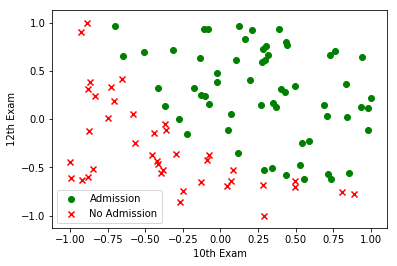

In [357]:
scatter(x[where(y == 1), 0], x[where (y == 1), 1], marker='o', c='g')
scatter(x[where(y == 0), 0], x[where (y == 0), 1], marker='x', c='r')
xlabel('10th Exam')
ylabel('12th Exam')
legend(['Admission', 'No Admission'])
show()

#### Hyper-Parameters
- We need to set initial value for theta_0 and theta_1 to train our model.
- 'alpha' is a Regularization parameter that penalizes the theta to make some parameter small to address high variance. That is, alpha will make sure that the decision boundary (line) is not over fitting.
- Number of Iteration we want to run to train our model.

In [358]:
initialTheta = [0,0]
alpha = 0.1
noIterations = 1000

#### Training
To train, we will run through definite number of iteration and called gredent descent function to adjust theta value such that the hypothesis (equation of a decision boundary) is best fitting.

In [359]:
print ('INITIAL THETA: ' , initialTheta)
print('INITIAL COST: %f' % (cost_function(x, y, initialTheta)))

new_theta = initialTheta
for i in range(noIterations):
    new_theta = gradient_descent(x, y, new_theta, alpha)
    
    #Uncomment following line for printing 'theta' and 'cost' every 100th loop.
    #if i % 100:
        #print ('Theta: ' , new_theta)
        #print('Cost: %f' % (cost_function(x, y, new_theta)))
        
print ('FINAL THETA: ' , new_theta)
print('FINAL COST: %f' % (cost_function(x, y, new_theta)))

INITIAL THETA:  [0, 0]
INITIAL COST: 0.693147
FINAL THETA:  [3.721163566206064, 3.429174757317077]
FINAL COST: 0.269710


#### Observations
We have the values for theta_0 and theta_1 for the given dataset. Which represents a decision boundary that classifies two diffrent labeled data. Putting this theta_0 and theta_1 values in hypothesis equation, for any value of feature_1 and feature_2,  we can predict / classify if the student can be given admission or not.